In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data= pd.read_csv("Shill Bidding Dataset.csv")
print(data.shape)
data.head()

(6321, 13)


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
data.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [4]:
data.value_counts()

Record_ID  Auction_ID  Bidder_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  Class
1          732         _***i      0.200000         0.400000       0.0                    0.000028      0.000000      0.993593                0.000028       0.666667       5                 0        1
10015      1341        l***t      0.083333         0.047619       0.0                    0.352785      0.142857      0.993593                0.352785       0.000000       3                 0        1
10013      412         i***i      0.016529         0.153846       0.0                    0.994410      0.000000      0.999935                0.976366       0.818182       1                 0        1
10011      412         d***u      0.105263         0.153846       0.0                    0.962731      0.000000      0.999935                0.944688       0.909091       1                 0        1
10009

In [5]:
data["Class"].value_counts()

Class
0    5646
1     675
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


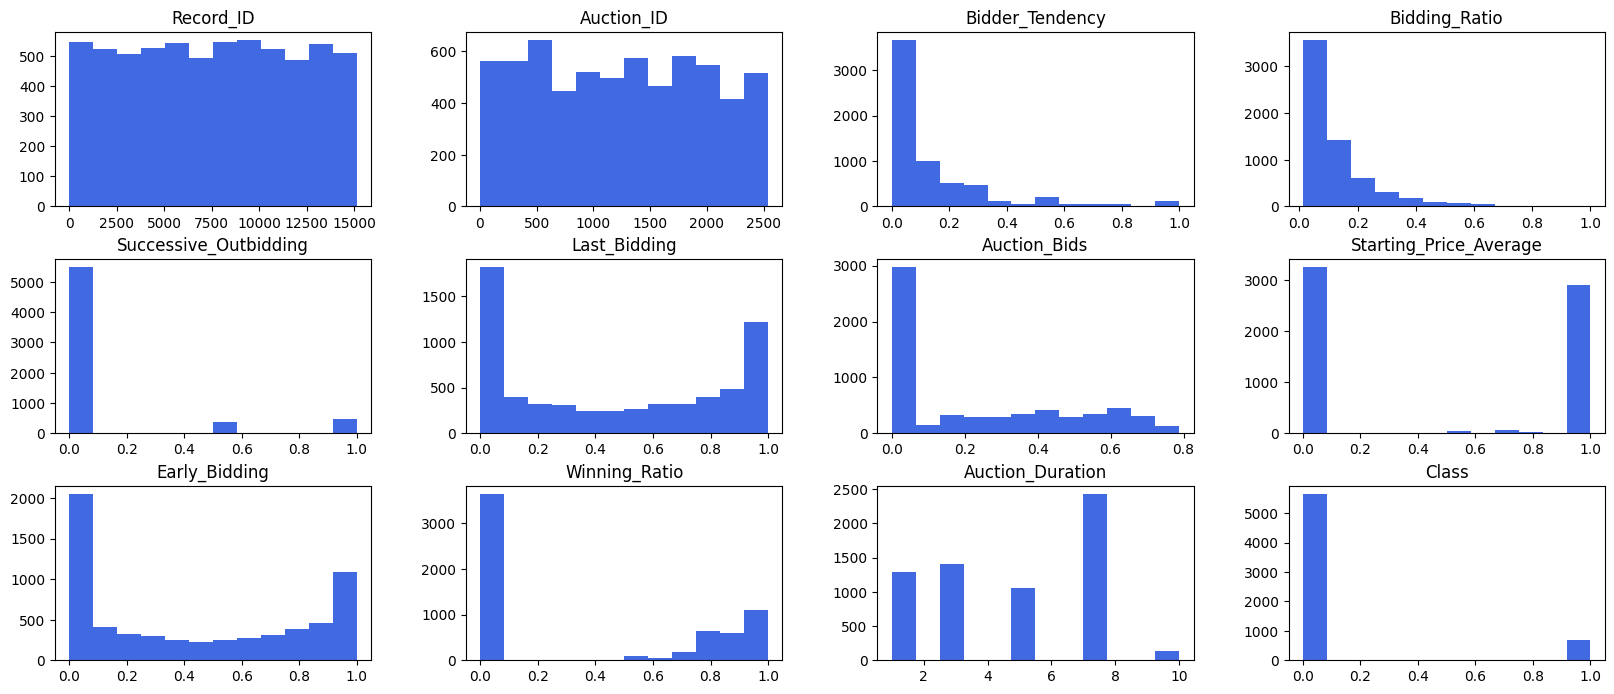

In [7]:
data.hist(bins = 12 , layout = (6,4), figsize = (20,17)  ,column = data.columns, grid = False,color="royalblue")
plt.show()

In [8]:
data=data.drop(columns=["Record_ID","Bidder_ID","Auction_ID"],axis=1)
data.shape

(6321, 10)

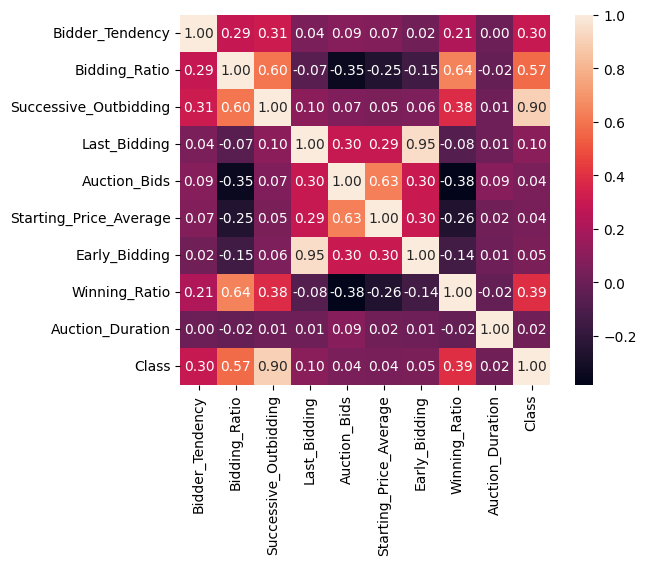

In [9]:
cm = np.corrcoef(data[data.columns].values.T)
hm = sns.heatmap(cm,cbar=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=data.columns,xticklabels=data.columns,annot=True)
plt.show()

In [10]:
# data= data.drop("Last_Bidding",axis=1)

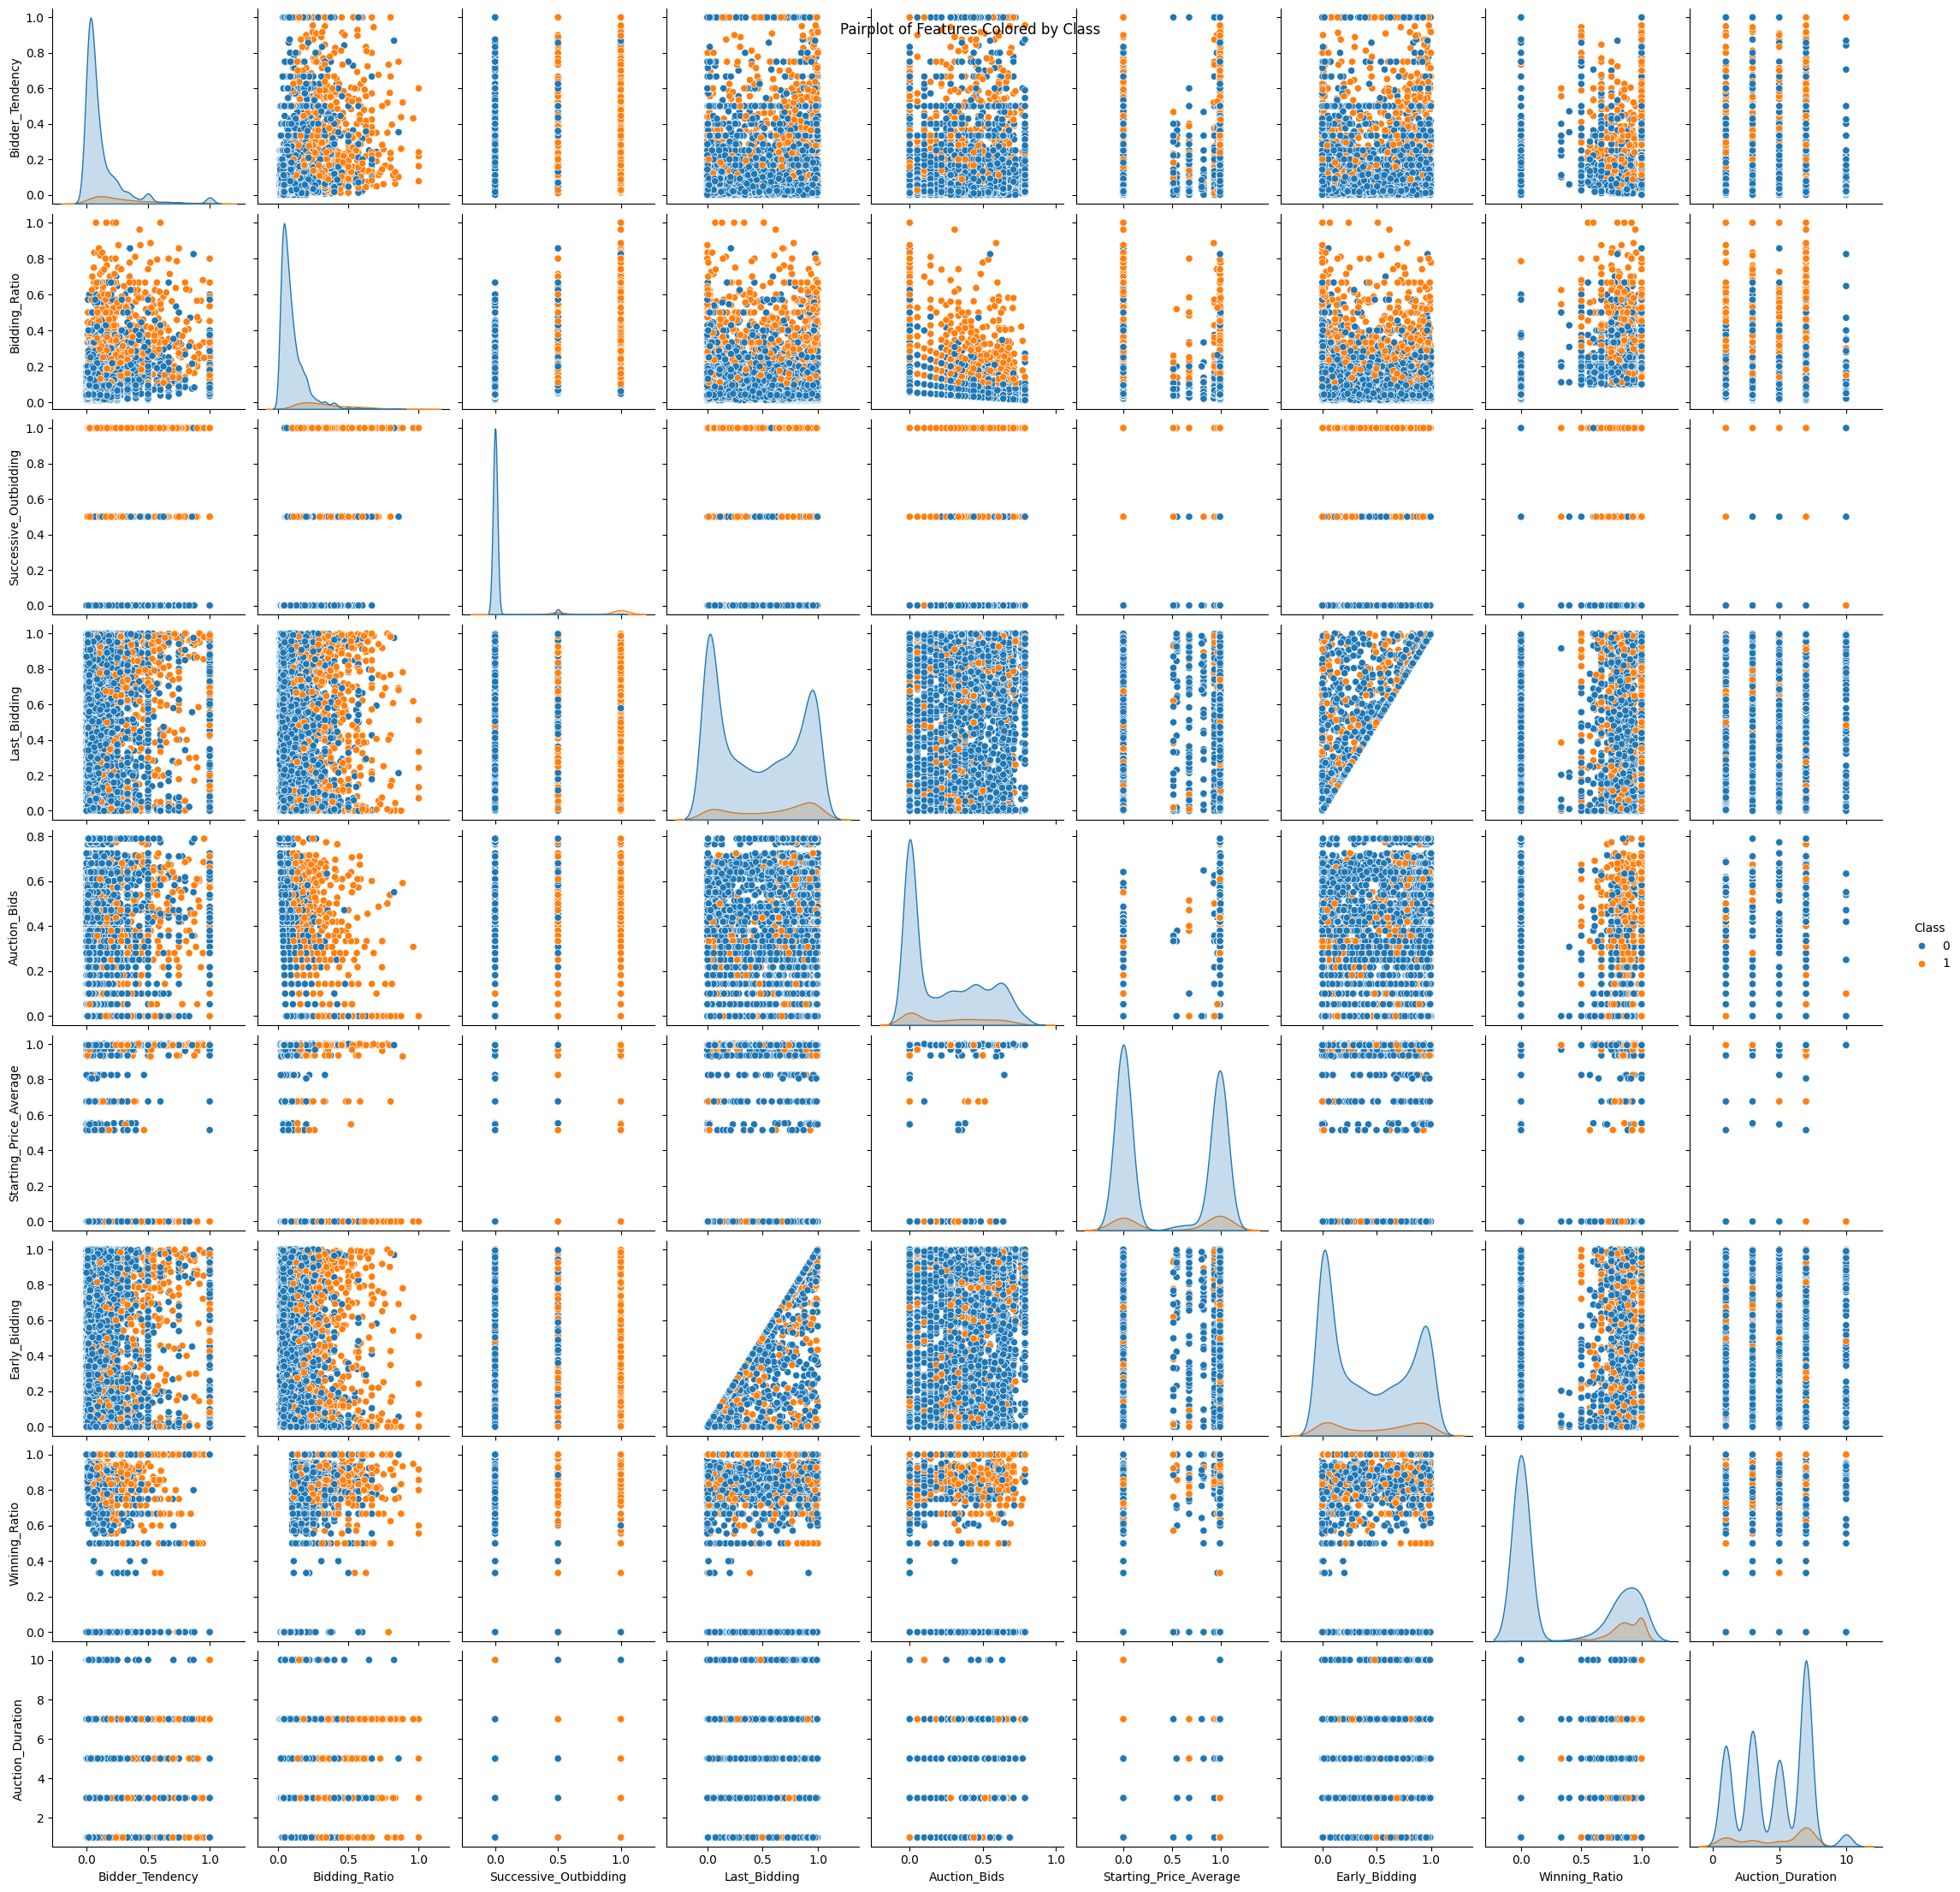

In [11]:
hue_var = 'Class'
sns.pairplot(data, hue=hue_var)
plt.suptitle("Pairplot of Features Colored by Class")
plt.show()

In [12]:
X = data.drop("Class",axis=1)
y = data['Class']

In [13]:
X

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7


In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6316    1
6317    0
6318    0
6319    0
6320    0
Name: Class, Length: 6321, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [16]:
clasif_nb = MultinomialNB(alpha=.5,fit_prior=False)
clasif_nb.fit(X_train,y_train)
nb_predict = clasif_nb.predict(X_test)
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1707
           1       0.43      1.00      0.60       190

    accuracy                           0.87      1897
   macro avg       0.71      0.93      0.76      1897
weighted avg       0.94      0.87      0.89      1897



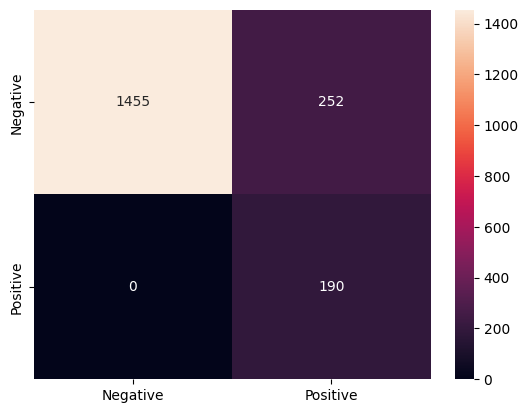

In [17]:
hm=sns.heatmap(confusion_matrix(y_test,nb_predict),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()


In [18]:
nb_params = {
    "alpha" : [.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],
    "fit_prior" : [True,False]
}
grid_nb= GridSearchCV(clasif_nb,nb_params,refit=True)
grid_nb.fit(X_train,y_train)
print(grid_nb.best_params_)

{'alpha': 3.0, 'fit_prior': True}


In [19]:
grid_nb_predict= grid_nb.predict(X_test)
print(classification_report(y_test,grid_nb_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1707
           1       0.96      0.74      0.83       190

    accuracy                           0.97      1897
   macro avg       0.97      0.87      0.91      1897
weighted avg       0.97      0.97      0.97      1897



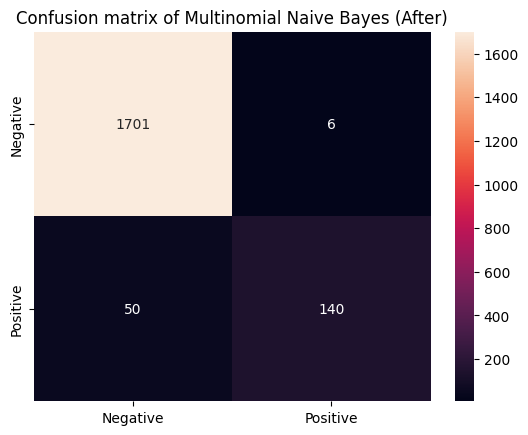

In [20]:
hm=sns.heatmap(confusion_matrix(y_test,grid_nb_predict),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.title("Confusion matrix of Multinomial Naive Bayes (After)")
plt.show()


In [21]:
clasif_svc = SVC(gamma=0.1)
clasif_svc.fit(X_train,y_train)
svc_pred = clasif_svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1707
           1       0.95      0.99      0.97       190

    accuracy                           0.99      1897
   macro avg       0.98      0.99      0.99      1897
weighted avg       0.99      0.99      0.99      1897



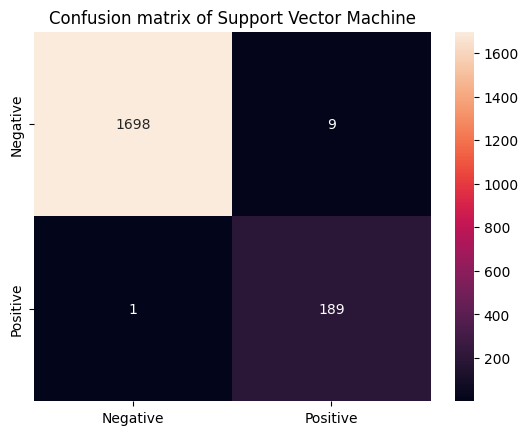

In [22]:
hm=sns.heatmap(confusion_matrix(y_test,svc_pred),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.title("Confusion matrix of Support Vector Machine")
plt.show()


In [23]:
clasif_knn = KNeighborsClassifier(n_neighbors=8)
clasif_knn.fit(X_train,y_train)
knn_pred = clasif_knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1707
           1       0.99      0.95      0.97       190

    accuracy                           0.99      1897
   macro avg       0.99      0.97      0.98      1897
weighted avg       0.99      0.99      0.99      1897



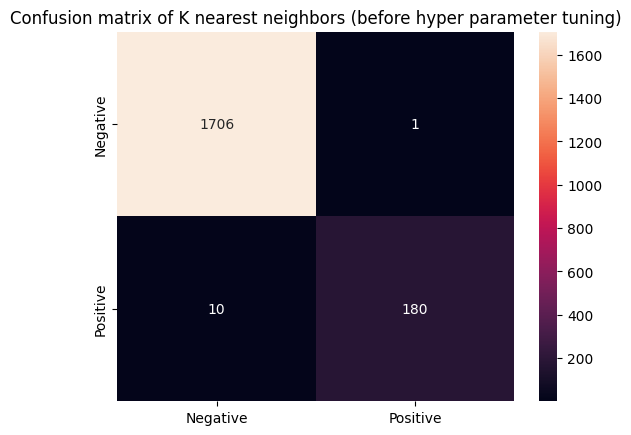

In [24]:
hm=sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.title("Confusion matrix of K nearest neighbors (before hyper parameter tuning)")
plt.show()

In [25]:
knn_predict = clasif_knn.predict(X_test)
k_range = range(1,31)
param_grid = dict(n_neighbors=k_range)
grid= GridSearchCV(clasif_knn,param_grid,cv=10,scoring="accuracy",refit=True)
grid.fit(X_train,y_train)
grid_knn_pred=grid.predict(X_test)
print(classification_report(y_test,grid_knn_pred))
print(grid.best_params_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       0.99      0.98      0.99       190

    accuracy                           1.00      1897
   macro avg       1.00      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897

{'n_neighbors': 1}


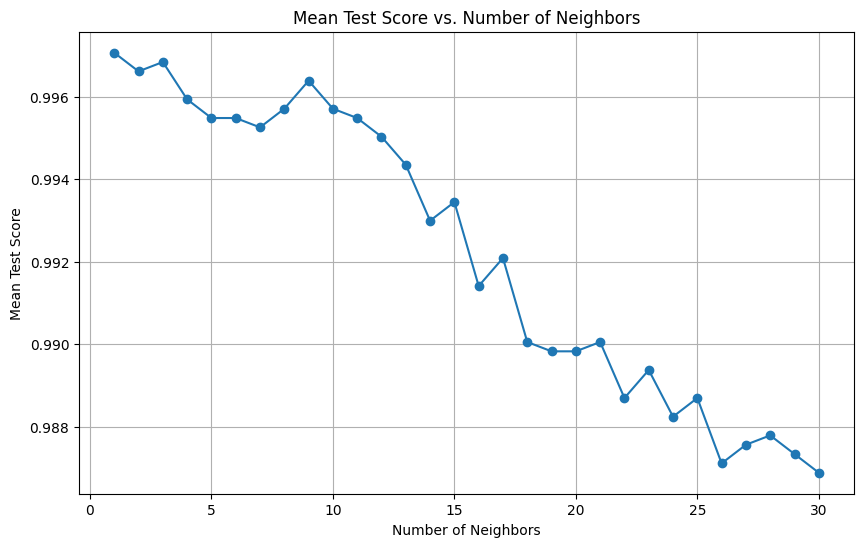

In [26]:
n_neighbors = grid.cv_results_['param_n_neighbors'].data
mean_test_score = grid.cv_results_['mean_test_score']


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mean_test_score, marker='o', linestyle='-')
plt.title('Mean Test Score vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()


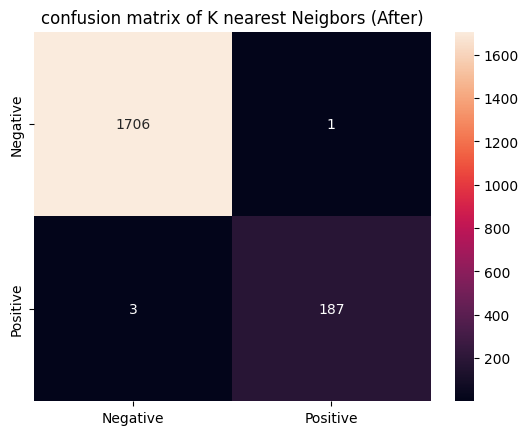

In [27]:
hm=sns.heatmap(confusion_matrix(y_test,grid_knn_pred),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.title("confusion matrix of K nearest Neigbors (After)")
plt.show()


In [28]:
voting_clasif = VotingClassifier([("knn",grid),("svc",clasif_svc),("Mnb",grid_nb)])
voting_clasif.fit(X_train,y_train)
voting_pred = voting_clasif.predict(X_test)
print(classification_report(y_test,voting_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       0.99      0.99      0.99       190

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



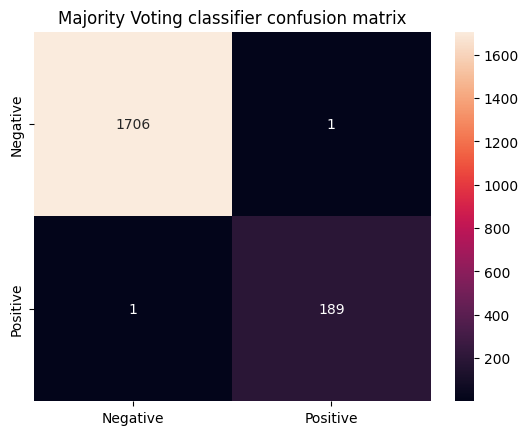

In [29]:
hm=sns.heatmap(confusion_matrix(y_test,voting_pred),annot=True,fmt='d')
hm.xaxis.set_ticklabels(['Negative', 'Positive'])
hm.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.title("Majority Voting classifier confusion matrix")
plt.show()


In [30]:
model_comparsion = {"KNN" : classification_report(y_test,grid_knn_pred,output_dict=True)['0'],"SVC" :classification_report(y_test,svc_pred,output_dict=True)['0'],"NB": classification_report(y_test,grid_nb_predict,output_dict=True)['0'] ,"VC": classification_report(y_test,voting_pred,output_dict=True)['0']}
model_comparsion

{'KNN': {'precision': 0.9982445874780573,
  'recall': 0.9994141769185706,
  'f1-score': 0.9988290398126464,
  'support': 1707.0},
 'SVC': {'precision': 0.9994114184814596,
  'recall': 0.9947275922671354,
  'f1-score': 0.9970640046975925,
  'support': 1707.0},
 'NB': {'precision': 0.9714448886350657,
  'recall': 0.9964850615114236,
  'f1-score': 0.9838056680161943,
  'support': 1707.0},
 'VC': {'precision': 0.9994141769185706,
  'recall': 0.9994141769185706,
  'f1-score': 0.9994141769185706,
  'support': 1707.0}}

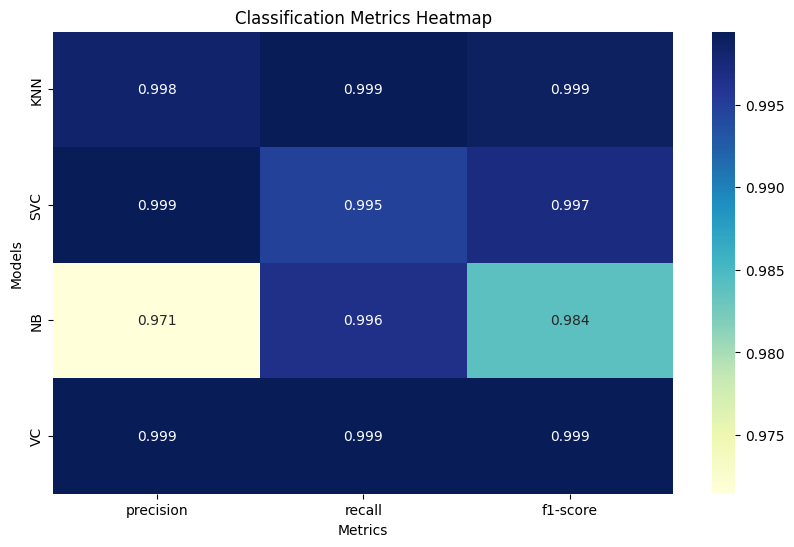

In [31]:
metrics = {}
for model, report in model_comparsion.items():
    precision = report['precision']
    recall = report['recall']
    f1_score = report['f1-score']
    metrics[model] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}
df = pd.DataFrame(metrics).T
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Classification Metrics Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()


In [32]:
print(accuracy_score(y_test,voting_pred))

0.9989457037427517


In [33]:
cvscore = cross_val_score(voting_clasif,X,y,cv=10)
print("mean test score: ",sum(cvscore)/10)

mean test score:  0.9981015157877898
